In [27]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import bz2
import _pickle as cPickle
import numpy as np
sns.set_theme()

In [31]:


def get_char_ments(charName, book):
    unique_ments = set()
    character = [x for x in book['characters'] if x['name']==charName][0]
    for ment in character['mentions']:
        unique_ments.add((ment['sentence_id'], ment['cluster_id']))
    return unique_ments

def get_emo_traj(charName, book):
    emos = []
    times = []
    emo_dict = {"pos" : 1, "neg" : -1, "amb" : 0}
    unique_ments = get_char_ments(charName, book)
    for sent_glob, sent in enumerate(book['sentences']):
        sent_id = sent['sentence_id']
        cluster_id = sent['cluster_id']
        if ((sent_id, cluster_id) in unique_ments):
            emos.append(emo_dict[sent['emotion_tags']['mini_emotion']]) #* sent.emotion_tags.probability)
        else:
            if len(emos) > 1:
                emos.append(emos[-1])
            else:
                emos.append(0)
    return emos

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_emos(charName, book, smoothingVals):
    emos = get_emo_traj(charName, book)
    plt.rcParams.update({'font.size': 22})
    
    for smoothingVal in smoothingVals:
        smoothed_emos = moving_average(emos, smoothingVal+1)
        plt.figure(figsize=(15,15))
        plt.title("Smoothed Trajectory of " + charName)
        plt.xlabel("Narrative Time")
        plt.ylabel("Sentiment")
        scaled_smoothed_emos = (smoothed_emos - (smoothed_emos.min()) ) /\
            (0.5 *(smoothed_emos.max() - smoothed_emos.min()) ) - 1
        normalized_time = np.arange(scaled_smoothed_emos.shape[0]) / scaled_smoothed_emos.shape[0]
        plt.plot(normalized_time, scaled_smoothed_emos)
        plotFilleName = charName + "_traj_mentions_" + str(smoothingVal) + "_smoothing.jpg"
#         plt.savefig(os.path.join(plotDir, plotFilleName))



In [32]:
with bz2.BZ2File('../../datasets/Gutenberg/processed/Charles Dickens___A Christmas Carol.pbz2', 'r') as f: 
    book = cPickle.load(f)


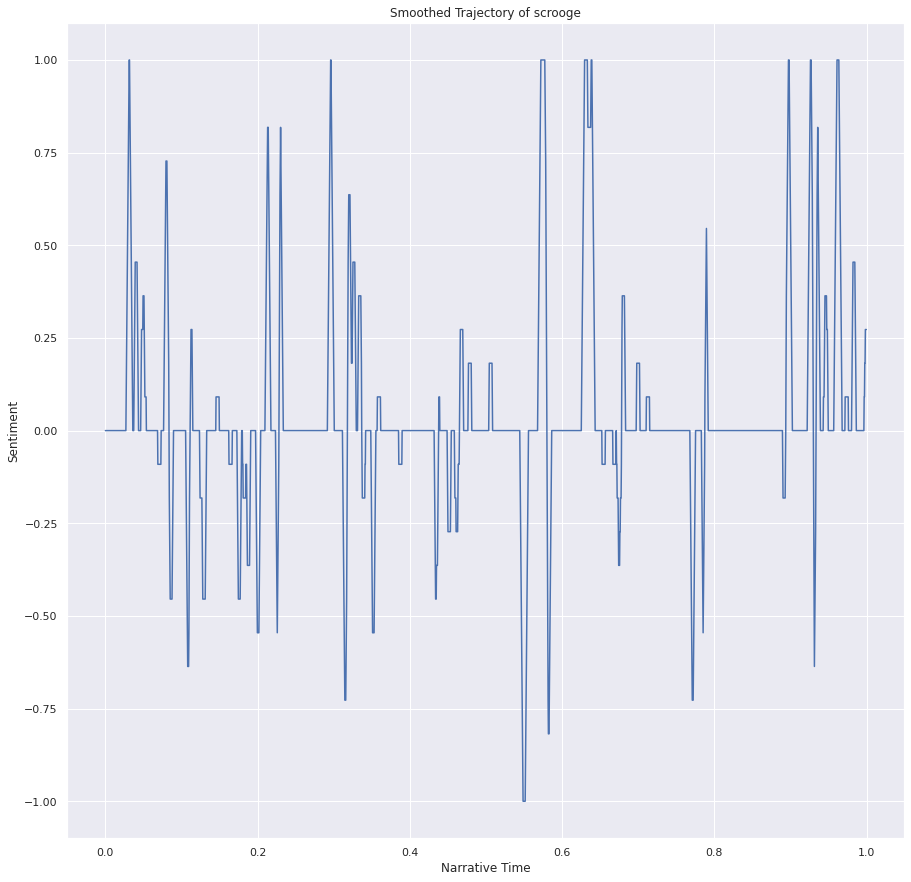

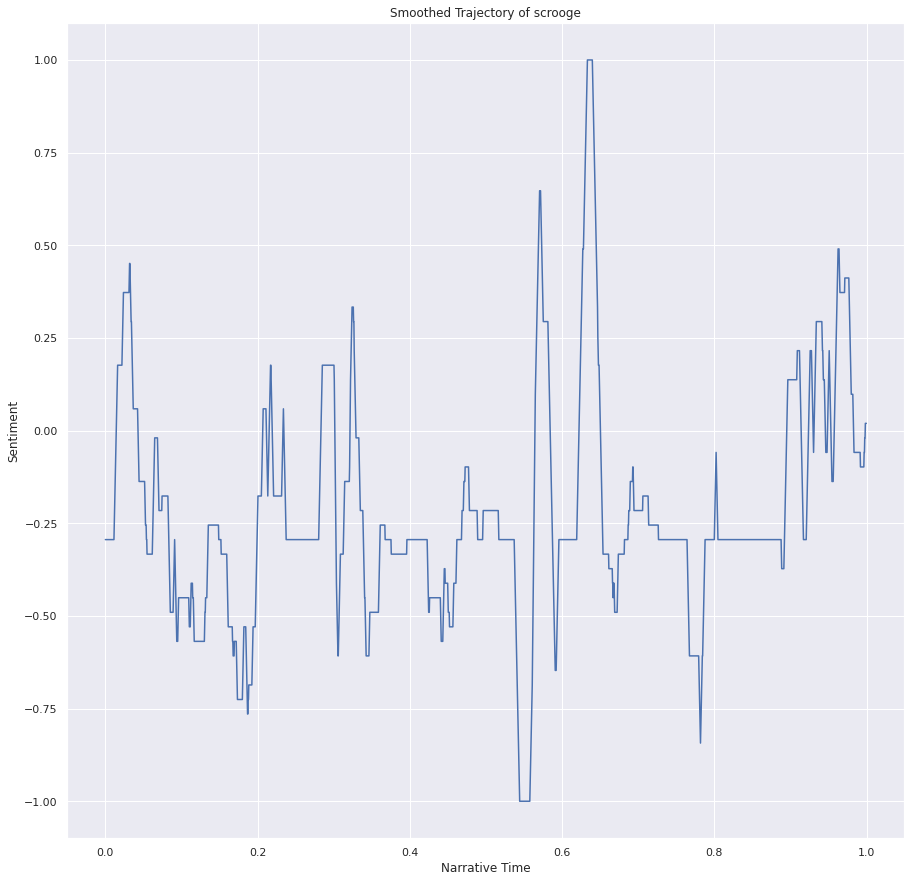

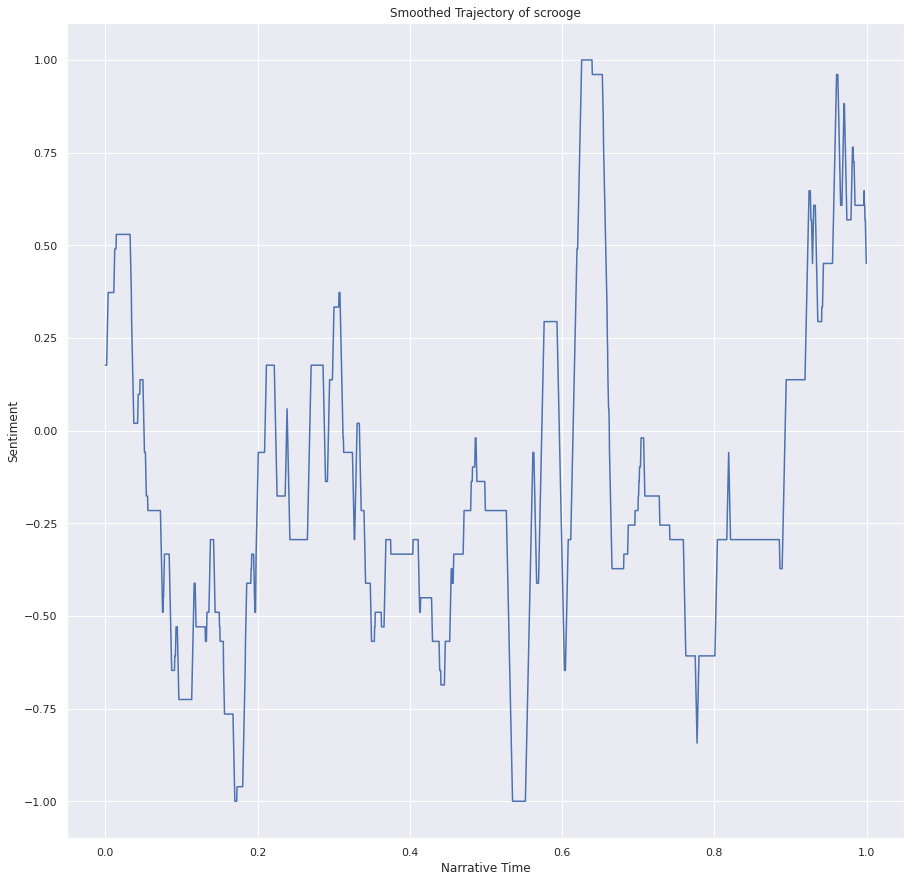

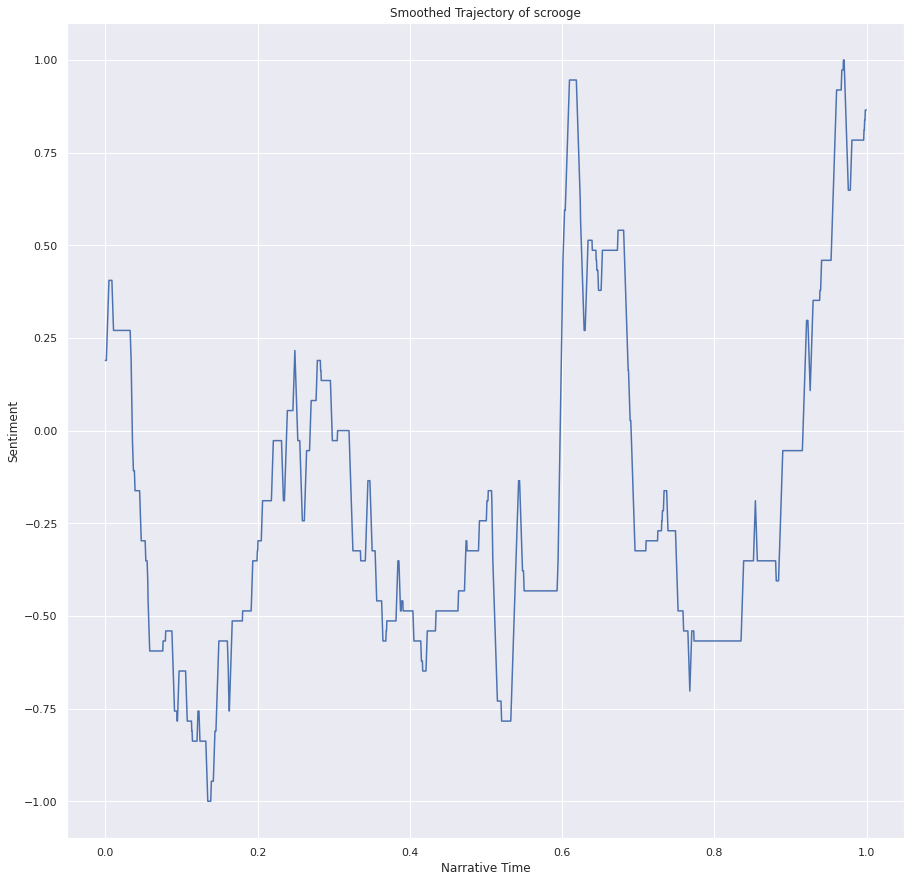

In [33]:
plot_emos("scrooge", book, [10, 50, 100, 200])

In [23]:
len(get_char_ments('scrooge',book))

497

In [22]:
book['sentences'][0]

{'sentence_id': 0,
 'cluster_id': 0,
 'global_token_start': 0,
 'text': ' A CHRISTMAS',
 'token_tags': [{'token_id': 0,
   'token_global_id': 0,
   'token': ' ',
   'lemma': ' ',
   'pos': 'SPACE',
   'tag': 'SPACE',
   'dep': '',
   'head_global_id': 1},
  {'token_id': 1,
   'token_global_id': 1,
   'token': 'A',
   'lemma': 'a',
   'pos': 'DET',
   'tag': 'DET',
   'dep': 'det',
   'head_global_id': 2},
  {'token_id': 2,
   'token_global_id': 2,
   'token': 'CHRISTMAS',
   'lemma': 'christmas',
   'pos': 'NOUN',
   'tag': 'NOUN',
   'dep': 'ROOT',
   'head_global_id': 2}],
 'emotion_tags': {'emotion': 'neutral',
  'mini_emotion': 'amb',
  'probability': 0.9999841451644897}}